In [ ]:
#importing the pandas library
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [ ]:
#reading both of the dataset
covid_cases = pd.read_csv('us-states.csv')
covid_vac = pd.read_csv('us_state_vaccinations.csv')


In [ ]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23939 entries, 0 to 23938
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    23939 non-null  datetime64[ns]
 1   state   23939 non-null  object        
 2   fips    23939 non-null  int64         
 3   cases   23939 non-null  int64         
 4   deaths  23939 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 935.2+ KB


In [ ]:
#Convert data type
covid_cases['date'] = covid_cases['date'].apply(pd.to_datetime)
covid_vac['date'] = covid_vac['date'].apply(pd.to_datetime)

#rename the "location" column name in the covid_vac dataset to state
covid_vac.rename(columns = {'location' : 'state'}, inplace= True)

In [ ]:
#merging both dataset based on the date that are the same
merge_cases_vac = pd.merge(covid_vac, covid_cases, how ="inner", on = ['date', 'state'] )
california_texas = merge_cases_vac.query('state == ["California", "Texas"]')
california_texas.tail(10)

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,fips,cases,deaths
5464,2021-05-01,Texas,19090255.0,25514685.0,11164737.0,27.46,65.84,7960964.0,38.50,87.99,204584.0,186869.0,6445.0,0.748,48,2896004,50455
5465,2021-05-02,Texas,19205116.0,25514685.0,11199365.0,27.72,66.23,8037727.0,38.62,87.99,114861.0,175147.0,6040.0,0.753,48,2897207,50470
5466,2021-05-03,Texas,19276649.0,25514685.0,11226347.0,27.87,66.48,8081630.0,38.72,87.99,71533.0,168987.0,5828.0,0.756,48,2901418,50484
5467,2021-05-04,Texas,19350193.0,26000725.0,11253017.0,28.04,66.73,8130177.0,38.81,89.67,73544.0,161661.0,5575.0,0.744,48,2904178,50567
5468,2021-05-05,Texas,19519836.0,26975255.0,11306814.0,28.44,67.32,8247643.0,38.99,93.03,169643.0,160608.0,5539.0,0.724,48,2906458,50626
5469,2021-05-06,Texas,19690275.0,27082705.0,11359643.0,28.85,67.91,8365487.0,39.18,93.40,170439.0,152584.0,5262.0,0.727,48,2909093,50690
5470,2021-05-07,Texas,19884729.0,27265505.0,11413686.0,29.34,68.58,8507634.0,39.36,94.03,194454.0,142723.0,4922.0,0.729,48,2912023,50748
5471,2021-05-08,Texas,20060525.0,27376775.0,11467096.0,29.76,69.18,8629882.0,39.55,94.42,175796.0,138610.0,4780.0,0.733,48,2913554,50789
5472,2021-05-09,Texas,20215285.0,27376675.0,11508786.0,30.15,69.72,8742609.0,39.69,94.42,154760.0,144310.0,4977.0,0.738,48,2914818,50806
5473,2021-05-10,Texas,20304544.0,27376675.0,11537922.0,30.37,70.03,8806632.0,39.79,94.42,89259.0,146842.0,5064.0,0.742,48,2917400,50828


In [ ]:
#california_texas.describe()
california_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 476 to 5473
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 238 non-null    datetime64[ns]
 1   state                                238 non-null    object        
 2   total_vaccinations                   230 non-null    float64       
 3   total_distributed                    230 non-null    float64       
 4   people_vaccinated                    230 non-null    float64       
 5   people_fully_vaccinated_per_hundred  228 non-null    float64       
 6   total_vaccinations_per_hundred       230 non-null    float64       
 7   people_fully_vaccinated              228 non-null    float64       
 8   people_vaccinated_per_hundred        230 non-null    float64       
 9   distributed_per_hundred              230 non-null    float64       
 10  daily_vacci

In [ ]:
#dropping columns that we don't need
cleaned_ca_tx = california_texas.drop(columns = ['fips',
                                                 'share_doses_used', 
                                                 "daily_vaccinations_raw", 
                                                 "daily_vaccinations_per_million",
                                                "people_fully_vaccinated_per_hundred",
                                                "total_vaccinations_per_hundred",
                                                "people_vaccinated_per_hundred",
                                                "distributed_per_hundred"])
cleaned_ca_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 476 to 5473
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     238 non-null    datetime64[ns]
 1   state                    238 non-null    object        
 2   total_vaccinations       230 non-null    float64       
 3   total_distributed        230 non-null    float64       
 4   people_vaccinated        230 non-null    float64       
 5   people_fully_vaccinated  228 non-null    float64       
 6   daily_vaccinations       236 non-null    float64       
 7   cases                    238 non-null    int64         
 8   deaths                   238 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 18.6+ KB


In [ ]:
cleaned_ca_tx.describe()


,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,cases,deaths
count,2.300000e+02,2.300000e+02,2.300000e+02,2.280000e+02,236.000000,2.380000e+02,238.000000
mean,1.189613e+07,1.585153e+07,7.756148e+06,4.279422e+06,216092.686441,3.091105e+06,48334.369748
std,8.710552e+06,1.086949e+07,5.367946e+06,3.642303e+06,106705.332800,5.019254e+05,8729.722663
min,8.163010e+05,1.949125e+06,7.035400e+05,1.000890e+05,65851.000000,2.018685e+06,31017.000000
25%,4.499530e+06,6.199569e+06,3.248146e+06,1.145936e+06,134585.500000,2.722753e+06,41893.500000
50%,9.852696e+06,1.342115e+07,6.652086e+06,3.232097e+06,194379.500000,2.912788e+06,48773.000000
75%,1.788711e+07,2.360253e+07,1.097843e+07,6.755356e+06,281268.500000,3.616779e+06,55285.000000
max,3.343813e+07,4.202068e+07,2.039393e+07,1.402882e+07,494575.000000,3.760124e+06,62331.000000


In [ ]:
median =cleaned_ca_tx.median()
median

/Users/nisaputri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


total_vaccinations          9852695.5
total_distributed          13421150.0
people_vaccinated           6652085.5
people_fully_vaccinated     3232097.0
daily_vaccinations           194379.5
cases                       2912788.5
deaths                        48773.0
dtype: float64

In [ ]:
freq_ca_tx= pd.crosstab(index=cleaned_ca_tx['state'], columns='count')
freq_ca_tx

col_0,count
state,
California,119
Texas,119


In [ ]:
cleaned_ca_tx.head(10)

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,cases,deaths
476,2021-01-12,California,816301.0,3286050.0,703540.0,100089.0,NaN,2816280,31105
477,2021-01-13,California,891489.0,3435650.0,744545.0,133689.0,75188.0,2857958,31653
478,2021-01-14,California,975293.0,3540175.0,801998.0,NaN,79496.0,2898652,32246
479,2021-01-15,California,1072959.0,3548575.0,865387.0,204374.0,85553.0,2937755,32947
480,2021-01-16,California,NaN,NaN,NaN,NaN,88381.0,2975319,33393
481,2021-01-17,California,NaN,NaN,NaN,NaN,90079.0,3006866,33593
482,2021-01-18,California,NaN,NaN,NaN,NaN,91210.0,3032260,33742
483,2021-01-19,California,1460430.0,3548575.0,1195969.0,260838.0,92018.0,3071361,34390
484,2021-01-20,California,1532329.0,4169450.0,1255311.0,273276.0,91549.0,3090690,35001
485,2021-01-21,California,1633875.0,4379500.0,1335886.0,293834.0,94083.0,3116266,35704


In [ ]:
#creating a new column and transform the month 
cleaned_ca_tx['month'] = cleaned_ca_tx['date'].dt.strftime('%B')
cleaned_ca_tx.tail(10)

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,cases,deaths,month
5464,2021-05-01,Texas,19090255.0,25514685.0,11164737.0,7960964.0,186869.0,2896004,50455,May
5465,2021-05-02,Texas,19205116.0,25514685.0,11199365.0,8037727.0,175147.0,2897207,50470,May
5466,2021-05-03,Texas,19276649.0,25514685.0,11226347.0,8081630.0,168987.0,2901418,50484,May
5467,2021-05-04,Texas,19350193.0,26000725.0,11253017.0,8130177.0,161661.0,2904178,50567,May
5468,2021-05-05,Texas,19519836.0,26975255.0,11306814.0,8247643.0,160608.0,2906458,50626,May
5469,2021-05-06,Texas,19690275.0,27082705.0,11359643.0,8365487.0,152584.0,2909093,50690,May
5470,2021-05-07,Texas,19884729.0,27265505.0,11413686.0,8507634.0,142723.0,2912023,50748,May
5471,2021-05-08,Texas,20060525.0,27376775.0,11467096.0,8629882.0,138610.0,2913554,50789,May
5472,2021-05-09,Texas,20215285.0,27376675.0,11508786.0,8742609.0,144310.0,2914818,50806,May
5473,2021-05-10,Texas,20304544.0,27376675.0,11537922.0,8806632.0,146842.0,2917400,50828,May


In [ ]:
cleaned_ca_tx.to_csv("cleaned_ca_tx.csv")

In [ ]:
#calculating the number of new cases and number of deaths by months
total_cases_per_month = cleaned_ca_tx.groupby(['state','month']).sum()
total_cases_per_month

total_vaccinations  total_distributed  people_vaccinated  \
state      month                                                                
California April            738294745.0        944896940.0        483090732.0   
           February         160840527.0        227050275.0        121703350.0   
           January           33789929.0         78655050.0         28021908.0   
           March            409917920.0        540066960.0        275883966.0   
           May              320200644.0        408839020.0        199022924.0   
Texas      April            471869283.0        624062750.0        289281212.0   
           February         108297624.0        144925440.0         77132378.0   
           January           28422289.0         48992875.0         23971424.0   
           March            267880487.0        362365205.0        172368732.0   
           May              196597407.0        265998370.0        113437413.0   

                     people_fully_vaccinated  daily_vaccinations      cases  \
state      month                                                              
California April                 276408681.0          12103863.0  111302729   
           February               38023621.0           5368000.0   97353501   
           January                 5492167.0           2201238.0   62194487   
           March                 135288675.0           9106751.0  112428440   
           May                   130559262.0           3052415.0   37520244   
Texas      April                 182315277.0           7384033.0   85336740   
           February               30308714.0           3000663.0   71536483   
           January                 4301585.0           1415220.0   44178631   
           March                  89499777.0           5787350.0   84759557   
           May                    83510385.0           1578341.0   29072153   

                      deaths  
state      month              
California April     1821517  
           February  1317354  
           January    720024  
           March     1747297  
           May        621101  
Texas      April     1487339  
           February  1150182  
           January    684298  
           March     1448005  
           May        506463

In [ ]:
from datetime import datetime

In [ ]:

california = cleaned_ca_tx[(cleaned_ca_tx.state == 'California')]
california_monthly = california.groupby(['month']).sum()
california_monthly = california_monthly.reset_index()
california_monthly['month_id'] = [4,2,1,3,5]
california_monthly = california_monthly.sort_values(by = 'month_id')
california_monthly = california_monthly.set_index('month')
california_monthly

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,cases,deaths,month_id
month,,,,,,,,
January,33789929.0,78655050.0,28021908.0,5492167.0,2201238.0,62194487,720024,1
February,160840527.0,227050275.0,121703350.0,38023621.0,5368000.0,97353501,1317354,2
March,409917920.0,540066960.0,275883966.0,135288675.0,9106751.0,112428440,1747297,3
April,738294745.0,944896940.0,483090732.0,276408681.0,12103863.0,111302729,1821517,4
May,320200644.0,408839020.0,199022924.0,130559262.0,3052415.0,37520244,621101,5


In [ ]:
texas = cleaned_ca_tx[(cleaned_ca_tx.state == 'Texas')]
tx_monthly = texas.groupby(['month']).sum()
tx_monthly = tx_monthly.reset_index()
tx_monthly['month_id'] = [4,2,1,3, 5]
tx_monthly = tx_monthly.sort_values(by = 'month_id')
tx_monthly = tx_monthly.set_index('month')
tx_monthly

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,cases,deaths,month_id
month,,,,,,,,
January,28422289.0,48992875.0,23971424.0,4301585.0,1415220.0,44178631,684298,1
February,108297624.0,144925440.0,77132378.0,30308714.0,3000663.0,71536483,1150182,2
March,267880487.0,362365205.0,172368732.0,89499777.0,5787350.0,84759557,1448005,3
April,471869283.0,624062750.0,289281212.0,182315277.0,7384033.0,85336740,1487339,4
May,196597407.0,265998370.0,113437413.0,83510385.0,1578341.0,29072153,506463,5


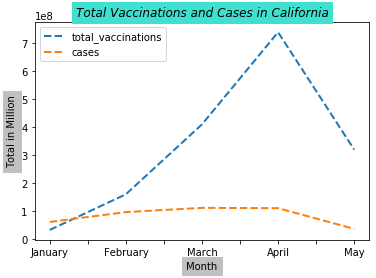

In [ ]:
# new dataset for state, cases, vacination, and death,
cali_vis = california_monthly[['total_vaccinations','cases']].plot(linestyle='--',
                                                                  linewidth=2)
plt.title("Total Vaccinations and Cases in California", 
          fontstyle='italic', 
          backgroundcolor='Turquoise')
plt.ylabel('Total in Million',
          backgroundcolor='silver')

plt.xlabel("Month",
          backgroundcolor='silver')


cali_vis


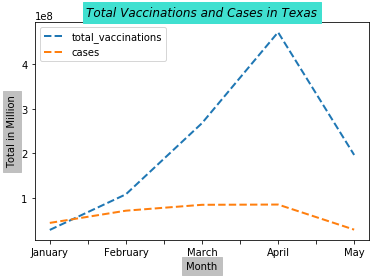

In [ ]:
tx_vis = tx_monthly[['total_vaccinations','cases']].plot(linestyle='--',
                                                                  linewidth=2)
plt.title("Total Vaccinations and Cases in Texas",
         fontstyle='italic', 
          backgroundcolor='Turquoise')
plt.ylabel('Total in Million',
          backgroundcolor='silver')

plt.xlabel("Month",
          backgroundcolor='silver')
tx_vis